# U.S. Medical Insurance Costs
This project analyzes U.S. medical insurance costs by examining how geographic region, BMI categories, and smoking status influence annual charges.
By computing key summary statistics and simple cross-tabulations, we uncover which factors drive higher expenses and how they interact.

### The dataset is available at: https://www.kaggle.com/datasets/mirichoi0218/insurance


## Imports & Settings  
<a id="imports--settings"></a>

In [57]:
#Imports and Configurations
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Configure display floats with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

## Table of Contents

- [Imports & Settings](#imports--settings) 

- [Data Loading & Preview](#data-loading--preview)

- [Region-Level Analysis](#region-level-analysis)

- [Charges by BMI Category](#charges-by-bmi-category)

- [Smoking × BMI Interaction](#smoking--bmi-interaction)

- [Final Conclusions](#final-conclusion)  

**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

### Analysis Questions

- Compare average medical charges by region: Determine if healthcare costs vary significantly by geographic location.
- Analyze charges by BMI category: Group patients by BMI ranges (e.g., underweight, normal, overweight, obese) and compare their average charges.
- Explore the interaction effect between smoking and BMI on charges: Are smokers with higher BMI paying significantly more

## Data Loading & Preview
<a id="data-loading--preview"></a>

In [56]:
### load the dataset into a pandas DataFrame
df = pd.read_csv('insurance.csv')

## Region-Level Analysis
<a id="region-level-analysis"></a>

In [ ]:
### Mean, median, standard deviation
yearly_charge_mean = df['charges'].mean() 
yearly_charge_median = df['charges'].median()
yearly_charge_sd = df['charges'].std() 

### Interquartile range (IQR): Q3 – Q1
q1, med, q3 = df['charges'].quantile([0.25, 0.5, 0.75])
yearly_cost_iqr = q3 - q1

### Region‐Level Aggregation
region_stats = (
    df.groupby('region', observed=True)['charges']
      .agg(
        mean_charge='mean',
        sd_cost='std',
        count='size'
      )
      .assign(pct_share=lambda x: x['count'] / len(df) * 100)
      .reset_index()
)

### The Region with Highest Average Cost
region_with_max_cost = region_stats.loc[
    region_stats['mean_charge'].idxmax(),
    'region'
]

### 🗺️ Insurance Charges by U.S. Region

| **Region**   | **Mean Charge (USD)** | **Standard Deviation** | **Count** | **% Share** |
|--------------|------------------------|--------------------------|-----------|-------------|
| Northeast     | 13,406.38              | 11,255.80                | 324       | 24.22%      |
| Northwest     | 12,417.58              | 11,072.28                | 325       | 24.29%      |
| Southeast     | 14,735.41              | 13,971.10                | 364       | 27.20%      |
| Southwest     | 12,346.94              | 11,557.18                | 325       | 24.29%      |

---

**📌 Summary Statistics**

- **Average Yearly Cost (Overall)**: \$13,270.42  
- **Median Cost**: \$9,382.03  
- **Interquartile Range (IQR)**: \$11,899.63  
- **Region with Highest Mean Cost**: **Southeast**

### Bar Chart: Average Cost by Region (±1 SD)

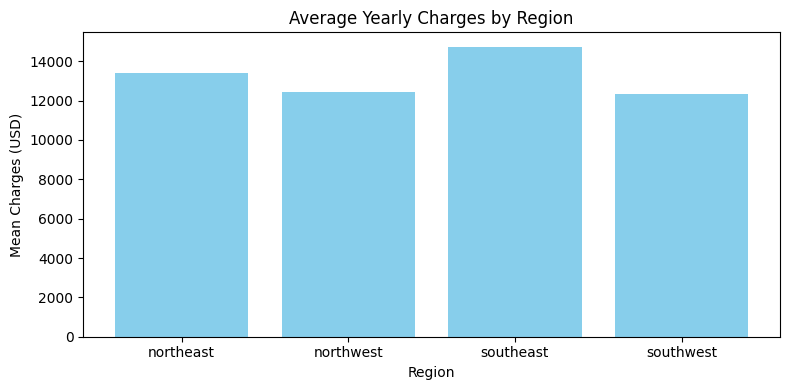

In [50]:
plt.figure(figsize=(8, 4))
plt.bar(region_stats['region'], region_stats['mean_charge'], color='skyblue')
plt.ylabel('Mean Charges (USD)')
plt.xlabel('Region')
plt.title('Average Yearly Charges by Region')
plt.tight_layout()
plt.show()

### Distribution of All Charges (Histogram with Median and IQR)

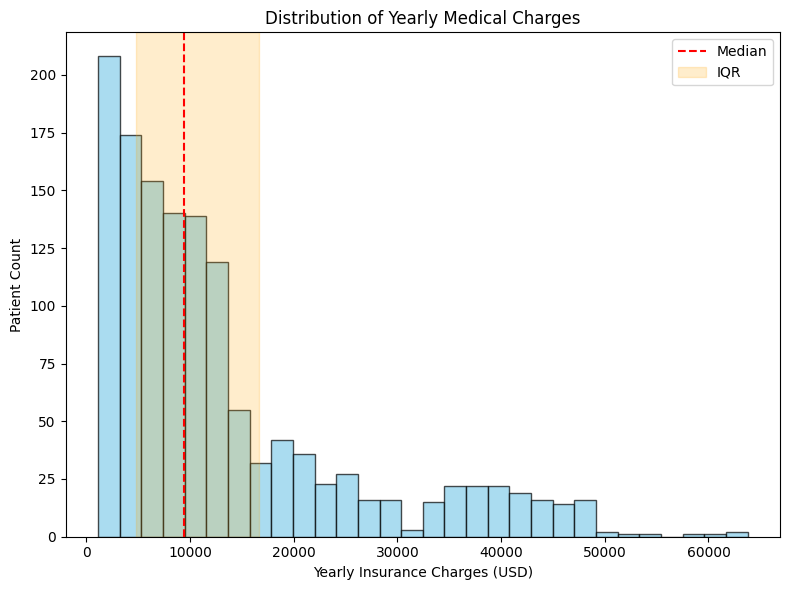

In [49]:
plt.figure(figsize=(8, 6))

# Plot histogram of raw charges
plt.hist(
    df['charges'],
    bins=30,
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)

# Vertical line at overall median
plt.axvline(
    yearly_charge_median,
    color='red',
    linestyle='--',
    label='Median'
)

# Shaded band for IQR (Q1 to Q3)
plt.axvspan(
    q1, q3,
    color='orange',
    alpha=0.2,
    label='IQR'
)

plt.xlabel('Yearly Insurance Charges (USD)')
plt.ylabel('Patient Count')
plt.title('Distribution of Yearly Medical Charges')
plt.legend()
plt.tight_layout()
plt.show()

### Discussion

- Objective: Evaluate whether geographic region influences annual insurance costs.

- Global Summary: Calculated mean, standard deviation, median, and IQR. The mean ($13.3 K) exceeded the median ($9.4 K) and the IQR was wide (~$11.9 K), revealing a pronounced right-skew and non-normal distribution—signaling factors beyond region at play.

- Regional Comparison: The Southeast had the highest average cost (~$14.7 K), but all regions’ means and standard deviations fell within a narrow band (±$1.2 K). This small inter-regional spread suggests geography contributes only marginally to cost differences.

- Distribution Shape: A histogram confirmed a long right tail of high-cost outliers, with most patients incurring charges below $15 K.

In conclusion, The Regional effects on the yearly insurance costs are minimal. 


## Charges By BMI Category
<a id="charges-by-bmi-category"></a>

- Analyze charges by BMI category: Group patients by BMI ranges (e.g., underweight, normal, overweight, obese) and compare their average charges.

In [65]:
# Define your bins and labels
bins   = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

# Create a new categorical column on df
df['bmi_class'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

# Calculate statistics for each BMI class
bmi_stats = (
    df
    .groupby('bmi_class', observed=True)['charges']
    .agg(
        mean_charge='mean',
        median_charge='median',
        sd_charge='std',
        iqr_charge=lambda x: x.quantile(0.75) - x.quantile(0.25),
        count='size'
    )
    .assign(pct_share=lambda d: d['count'] / len(df) * 100)
)

overall_mean = df['charges'].mean()
bmi_stats['mean_ratio'] = bmi_stats['mean_charge'] / overall_mean

### 📊 Summary Statistics by BMI Category

| **BMI Class**  | **Mean Charge (USD)** | **Median Charge (USD)** | **Standard Deviation** | **IQR**     | **Count** | **% Share** |
|----------------|------------------------|---------------------------|-------------------------|-------------|-----------|--------------|
| Underweight     | 8,657.62               | 6,640.54                  | 7,591.73                | 10,054.26   | 21        | 1.57%        |
| Healthy         | 10,435.44              | 8,604.15                  | 7,484.43                | 11,050.43   | 226       | 16.89%       |
| Overweight      | 10,997.80              | 8,659.38                  | 8,067.25                | 11,157.28   | 386       | 28.85%       |
| Obese           | 15,560.93              | 9,964.06                  | 14,563.06               | 14,432.57   | 705       | 52.69%       |

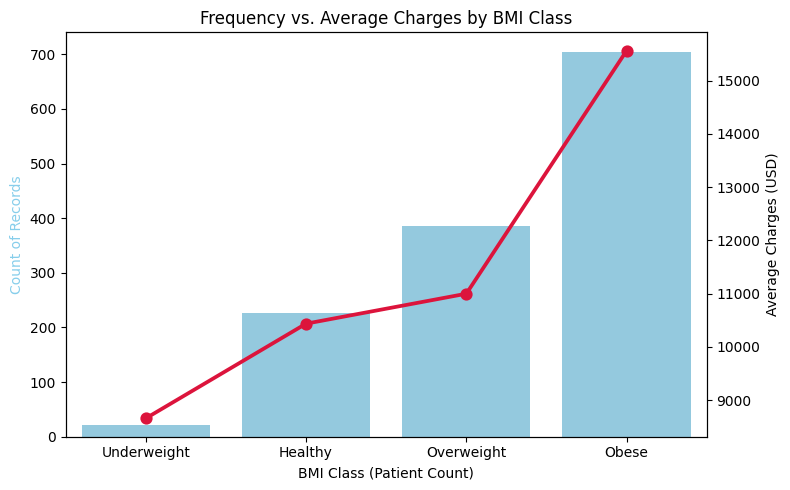

In [ ]:
# Plotting the BMI class statistics
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar for frequency
sns.barplot(
    data=bmi_stats,
    x='bmi_class',
    y='count',
    color='skyblue',
    ax=ax1
)
ax1.set_ylabel('Count of Records', color='skyblue')
ax1.set_xlabel('BMI Class (Patient Count)')

# Line for average charges on secondary y-axis
ax2 = ax1.twinx()
sns.pointplot(
    data=bmi_stats,
    x='bmi_class',
    y='mean_charge',
    color='crimson',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Average Charges (USD)')
plt.title('Frequency vs. Average Charges by BMI Class')
plt.tight_layout()
plt.show()

### Discussion

From the data it can be deducted that:
- Underweight (1.57% of sample) has the lowest mean charge 8,658 and median of 6,641.

- Healthy (16.89%) jumps to a mean of about 10,435 and median of 8,604.

- Overweight (28.85%) edges up further to a mean of 10,998 and median of 8,659.

- Obese (52.69%) shows the highest mean of 15,561 and median of 9,964.

Variability (SD and IQR) also grows with BMI class, indicating not only higher average costs but wider dispersion in the obese group.
Even though the obese bmi category make up over half the sample, the rising costs between categories i.e the higher bmi category the higher the cost
Shows thats indeed a higher bmi calls drives a higher yearly insurance cost.



## Charges vs Smoking and BMI
<a id="Charges vs Smoking and BMI"></a>

Explore the interaction effect between smoking and BMI on charges: Are smokers with higher BMI paying significantly more

In [51]:
# divide bmi class by smoker status
mean_table = df.pivot_table(
    index='bmi_class',
    columns='smoker',
    values='charges',
    aggfunc='mean'
)
mean_table['gap_pct'] = (mean_table['yes'] / mean_table['no'] - 1) * 100


# Calculate correlation between bmi class and smoker status
r_smokers = df[df.smoker=='yes'][['bmi','charges']].corr().loc['bmi','charges']
r_nonsmokers = df[df.smoker=='no'][['bmi','charges']].corr().loc['bmi','charges']

C:\Users\Yoav\AppData\Local\Temp\ipykernel_8796\3447287900.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_table = df.pivot_table(


### 📊 Mean Charges by BMI Class and Smoking Status

| **BMI Class**   | **Non-Smokers (USD)** | **Smokers (USD)** | **Gap (%)** |
|----------------|------------------------|--------------------|-------------|
| Underweight     | 5,485.06               | 18,809.82          | 242.93%     |
| Healthy         | 7,734.65               | 19,942.22          | 157.83%     |
| Overweight      | 8,226.09               | 22,491.18          | 173.41%     |
| Obese           | 8,853.28               | 41,692.81          | 370.93%     |

**Correlation Between BMI & Insurance Charges**  
- **Smokers**: *r = 0.81*  
- **Non-Smokers**: *r = 0.08*



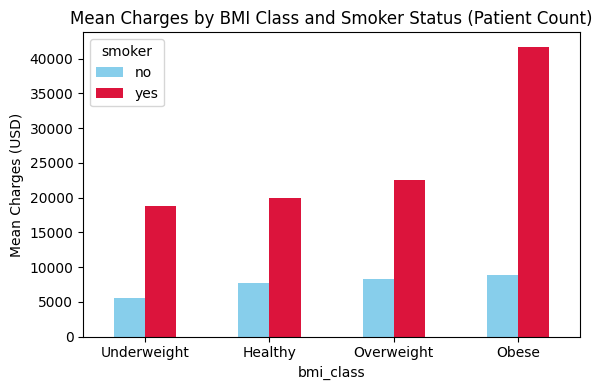

In [47]:
mean_table[['no','yes']].plot(
  kind='bar',
  figsize=(6,4),
  color=['skyblue','crimson']
)
plt.ylabel('Mean Charges (USD)')
plt.title('Mean Charges by BMI Class and Smoker Status (Patient Count)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




### Discussion

- The difference in mean annual insurance costs between smokers and non-smokers shows that smoking alone drives a significant
 increase in expenses, independent of BMI.
- The correlation between BMI and charges is strong for smokers (r = 0.81) but nearly nonexistent for non-smokers (r = 0.08), indicating that BMI only meaningfully affects costs among those who smoke.


##  Final Conclusion and Further work 
<a id="final-conclusion"></a>

In this analysis the goal was to see if there is a connection between the yearly insurance cost between different parameters: region, bmi and smoking. 

- Region has only a marginal effect on mean charges—no region stands out with dramatically higher costs.

- Mean charges rise monotonically with BMI class: Underweight → Healthy → Overweight → Obese.

- Smoking inflates costs substantially, and the BMI–cost link is strong among smokers but negligible among non-smokers.

Geography plays only a minor role in insurance charges. Higher BMI correlates with higher costs, but smoking is the single strongest driver—and it amplifies BMI’s effect.


### Further work 

- Investigate the combined impact of additional features—such as sex and number of children—on insurance charges to identify more complex interactions.
- Based on current findings, an individual profile with obesity, smoking status, male gender, and multiple children is likely associated with the highest average insurance cost. This inference draws from both statistical outcomes and the assumption that these attributes compound risk-related pricing factors.
- Additionally, be mindful of potential biases embedded in the data. Attributes like age, sex, BMI, number of children, smoking, and region may reflect or amplify systemic disparities. For example:
- Muscular individuals may be unfairly flagged as high-risk due to elevated BMI.
- Smokers from marginalized backgrounds could face inflated costs due to self-reporting stigma.
- Residents in underserved rural areas may be penalized if lack of access to care is mistaken for higher risk.